In [1]:
import sympy
import numpy 
import matplotlib.pyplot as plt
x = sympy.symbols('x')

In [2]:
def find_coeff(inp_x, inp_y, h, alpha, b, d, c, l, m, z, n):
    for i in range(n - 1):
        h[i] = inp_x[i + 1] - inp_x[i]
    for i in range(1, n - 1):
        alpha[i] = 3 / h[i] * (inp_y[i + 1] - inp_y[i])  - 3 / h[i - 1] * (inp_y[i] - inp_y[i - 1])
    for i in range(1, n - 1):
        l[i] = 2 * (inp_x[i + 1] - inp_x[i - 1]) - h[i - 1] * m[i - 1]
        m[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i - 1] * z[i - 1]) / l[i]
    for i in range(n - 2, -1, -1):
        c[i] = z[i] - m[i] * c[i + 1]
        b[i] = ((inp_y[i + 1] - inp_y[i]) / h[i]) - (h[i] * (c[i + 1] + 2 * c[i]) / 3)
        d[i] = (c[i + 1] - c[i]) / (3 * h[i])

In [3]:
def take_spline(f, n, inp_y, b, inp_x, c, d):
    for i in range(n - 1):
        f.append(inp_y[i] + b[i] * (x - inp_x[i]) + c[i] * (pow(x - inp_x[i], 2)) + d[i] * (pow(x - inp_x[i], 3)))
    print(f)

In [4]:
def cubic_spline(x_in, f, inp_x, n):
    maxind = n - 1
    for i in range(n - 1, 0, -1):
        if (x_in < inp_x[i]):
            maxind = i
    return f[maxind - 1].subs(x, x_in)

In [5]:
def show_spline(f, inp_x, n):
    x_gr = []
    y_gr = []
    for i in range(int((inp_x[n - 1] - inp_x[0]) * 100 + 1)):
        x_gr.append(inp_x[0] + i / 100)
        y_gr.append(cubic_spline(inp_x[0] + i / 100, f, inp_x, n))
    plt.title('Cubic Spline')
    plt.grid(True)
    #plt.scatter(xin, cubic_spline(xin, f, inp_x, n), color='red')
    plt.plot(x_gr, y_gr, color='green')

In [6]:
def make_spline(inp_x, inp_y, f, n):
    h = numpy.zeros(n - 1)
    alpha = numpy.zeros(n - 1)
    b = numpy.zeros(n - 1)
    d = numpy.zeros(n - 1)
    c = numpy.zeros(n)
    l = numpy.ones(n - 1)
    m = numpy.zeros(n - 1)
    z = numpy.zeros(n - 1)
    find_coeff(inp_x, inp_y, h, alpha, b, d, c, l, m, z, n)
    take_spline(f, n, inp_y, b, inp_x, c, d)
    print(alpha, b, c, d)
    show_spline(f, inp_x, n)

In [7]:
def find_min_difference(inp_x, f1, f2, n, eps):
    it = (inp_x[-1] - inp_x[0]) * 10 ** eps
    min = 999999999999
    result = in_x = 0
    for i in range(it + 1):
        diff = cubic_spline(inp_x[0] + i * 10 ** (-eps), f1, inp_x, n) - cubic_spline(inp_x[0] + i * 10 ** (-eps), f2, inp_x, n)
        print(diff)
        if (diff < min):
            min = diff
            in_x = inp_x[0] + i * 10 ** -eps
            result = diff
    print(in_x, result)

In [8]:
def check_for_min(min, f, x_in, inp_x):
    a = cubic_spline(f=f, inp_x=inp_x, n=len(inp_x), x_in=x_in)
    print(a)
    if min[0] > a: 
        min[0] = a
        min[1] = x_in
    return min

In [9]:
def find_min_difference1(inp_x, f):
    min = [99999999999, -1]
    for i in range(1, len(f)):
        arr = sympy.solve(sympy.diff(f[i], x))
        print(arr)
        min = check_for_min(f=f, inp_x=inp_x, min=min, x_in=arr[0])
        min = check_for_min(f=f, inp_x=inp_x, min=min, x_in=arr[1])
    print(min)

In [10]:
#print("Значение кубического сплайна (в точке x = ", xin, ") = ", cubic_spline(xin, f, inp_x, n), sep="")

[-0.212214285714286*x + 0.0248571428571429*(x - 1)**3 + 0.953214285714286, -0.193571428571428*x - 0.0122857142857146*(x - 1.5)**3 + 0.0372857142857144*(x - 1.5)**2 + 0.928357142857143, -0.1655*x + 0.00828571428571476*(x - 2)**3 + 0.0188571428571424*(x - 2)**2 + 0.88, -0.140428571428572*x - 0.0208571428571431*(x - 2.5)**3 + 0.0312857142857146*(x - 2.5)**2 + 0.823071428571429]
[ 0.     0.084  0.072  0.072] [-0.21221429 -0.19357143 -0.1655     -0.14042857] [ 0.          0.03728571  0.01885714  0.03128571  0.        ] [ 0.02485714 -0.01228571  0.00828571 -0.02085714]


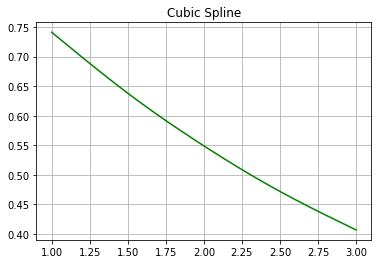

In [11]:
inp1_x = [1, 1.5, 2, 2.5, 3]
inp1_y = [0.741, 0.638, 0.549, 0.472, 0.407]
n1 = len(inp1_x)
f1 = []
make_spline(inp1_x, inp1_y, f1, n1)
plt.show()

In [12]:
sympy.solve(sympy.diff(f1[0]))

[-0.686945595036491, 2.68694559503649]

In [13]:
# print(sympy.diff(sympy.diff(f[1])).subs(x, 2))
# print(sympy.diff(sympy.diff(f[2])).subs(x, 2))

In [14]:
#Коды Баркера, обобщение, применить различные методы оптимизации. начать с метода множителей Лагранжа.

[-0.427392857142857*x - 0.138428571428571*(x - 1)**3 + 0.700392857142857, -0.531214285714286*x + 0.388142857142857*(x - 1.5)**3 - 0.207642857142857*(x - 1.5)**2 + 0.838821428571429, -0.44775*x + 0.553857142857143*(x - 2)**3 + 0.374571428571429*(x - 2)**2 + 0.6685, 0.342214285714286*x - 0.803571428571428*(x - 2.5)**3 + 1.20535714285714*(x - 2.5)**2 - 1.14353571428571]
[ 0.    -0.228  1.248  2.598] [-0.42739286 -0.53121429 -0.44775     0.34221429] [ 0.         -0.20764286  0.37457143  1.20535714  0.        ] [-0.13842857  0.38814286  0.55385714 -0.80357143]


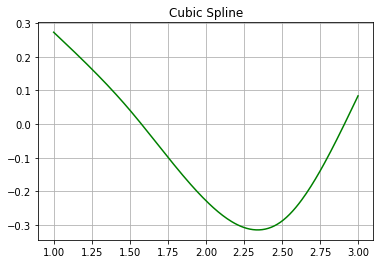

In [15]:
inp2_x = [1, 1.5, 2, 2.5, 3]
inp2_y = [0.273, 0.042, -0.227, -0.288, 0.084]
n2 = len(inp2_x)
f2 = []
make_spline(inp2_x, inp2_y, f2, n2)
plt.show()

[-0.212214285714286*x + 0.0248571428571429*(x - 1)**3 + 0.953214285714286, -0.193571428571428*x - 0.0122857142857146*(x - 1.5)**3 + 0.0372857142857144*(x - 1.5)**2 + 0.928357142857143, -0.1655*x + 0.00828571428571476*(x - 2)**3 + 0.0188571428571424*(x - 2)**2 + 0.88, -0.140428571428572*x - 0.0208571428571431*(x - 2.5)**3 + 0.0312857142857146*(x - 2.5)**2 + 0.823071428571429]
[ 0.     0.084  0.072  0.072] [-0.21221429 -0.19357143 -0.1655     -0.14042857] [ 0.          0.03728571  0.01885714  0.03128571  0.        ] [ 0.02485714 -0.01228571  0.00828571 -0.02085714]
[-0.427392857142857*x - 0.138428571428571*(x - 1)**3 + 0.700392857142857, -0.531214285714286*x + 0.388142857142857*(x - 1.5)**3 - 0.207642857142857*(x - 1.5)**2 + 0.838821428571429, -0.44775*x + 0.553857142857143*(x - 2)**3 + 0.374571428571429*(x - 2)**2 + 0.6685, 0.342214285714286*x - 0.803571428571428*(x - 2.5)**3 + 1.20535714285714*(x - 2.5)**2 - 1.14353571428571]
[ 0.    -0.228  1.248  2.598] [-0.42739286 -0.53121429 -0.44

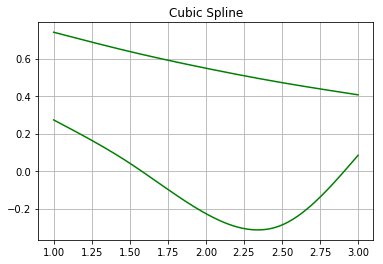

In [16]:
f1 = []
f2 = []
make_spline(inp1_x, inp1_y, f1, n1)
make_spline(inp2_x, inp2_y, f2, n2)
plt.show()

In [17]:
find_min_difference(inp1_x, f1, f2, n1, 1)

0.468000000000000
0.489681142857143
0.512342000000000
0.536962285714286
0.564521714285714
0.596000000000000
0.631813142857143
0.670122285714286
0.708524857142857
0.744618285714286
0.776000000000000
0.800122285714286
0.813856857142857
0.813930285714286
0.797069142857143
0.760000000000000
0.700777714285714
0.622770285714286
0.530674000000000
0.429185142857143
0.323000000000000
3.0 0.323000000000000


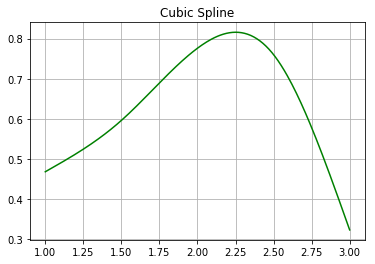

[2.32506120728431, 3.67493879271569]
[1.13587592531484, 2.27190145606225]
0.497647202389784
0.815479126942942
[1.31396167138324, 2.25136956716088]
0.540611158905442
0.815807241094883
[2.32506120728431, 3.67493879271569]
0.811423023417314
-0.158311709062563
[-0.158311709062563, 3.67493879271569]


In [18]:
f3 = numpy.array(f1) - numpy.array(f2)
show_spline(f=f3, inp_x=inp1_x, n=n1)
plt.show()
print(sympy.solve(sympy.diff(f3[3], x), x))
find_min_difference1(f=f3, inp_x=inp1_x)

In [19]:
print(cubic_spline(f=f2, n= n1, inp_x= inp1_x, x_in= 2.25))
print(cubic_spline(f=f1, n= n1, inp_x= inp1_x, x_in= 2.25))
plt.show()

-0.306872767857143
0.508933035714286
